## Recitation Week 2

Gradient descent + Intro to scikit-learn

### I. Reminder on gradient descent

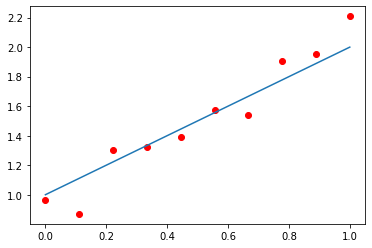

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta0true = 1
beta1true = 1

x = np.linspace(0,1,10)

t = beta0true + beta1true *x

tnoisy = t + np.random.normal(0,.1,len(x))


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

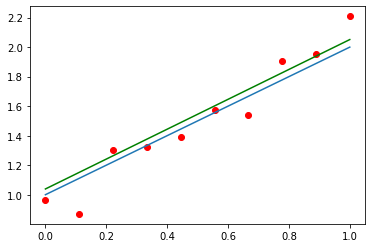

In [2]:
# sum_i (t^i - (beta0 + beta1 x_1^i))^2

eta = .001

maxIter = 200

beta0 = np.random.normal(0,.1,1)
beta1 = np.random.normal(0,.1,1)

beta = np.squeeze(np.asarray([beta0, beta1]))

Xtildemat = np.hstack((np.ones((len(x), 1)), x.reshape(-1,1)))


for iteration in np.arange(maxIter):
    
    beta0 = beta0 - \
    (2/len(x))*eta * np.sum((tnoisy.reshape(-1,1) - np.matmul(Xtildemat, beta))*(-1))
        
        
    beta1 = beta1 - \
    (2/len(x))*eta* np.sum(np.multiply((tnoisy.reshape(-1,1) - np.matmul(Xtildemat, beta)), -x.reshape(-1,1)))

    beta = np.squeeze(np.asarray([beta0, beta1]))
    
    
beta_learned = np.squeeze(np.asarray([beta0, beta1]))


xprediction = np.linspace(0,1,100)

XpredictionMatrix = np.hstack((np.ones((len(xprediction), 1)), \
                               xprediction.reshape(-1,1)))


prediction = np.matmul(XpredictionMatrix, beta_learned)


plt.scatter(x, tnoisy, c='r')
plt.plot(xprediction, prediction, c='g')
plt.plot(x, t)
plt.show()



### II. Using scikit-learn LinearRegression

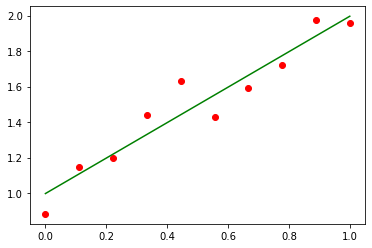

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x.reshape(-1,1), tnoisy)

x_prediction = np.linspace(0,1,100)

predictions = reg.predict(x_prediction.reshape(-1,1))


plt.scatter(x, tnoisy, c='r')
plt.plot(x_prediction, predictions, c='g')
plt.show()



### III. Non Linear Data Distribution

__III.a__ Adding polynomial features and higher dimensional space

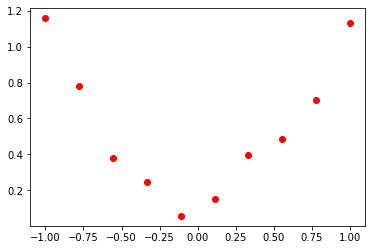

In [52]:

x = np.linspace(-1,1,10)

beta0true = .1
beta1true = .1
beta2true = 1

t = beta0true + beta1true *x + beta2true * (x**2)

tnoisy = t + np.random.normal(0,.1,len(x))

plt.scatter(x, tnoisy, c='r')
plt.show()

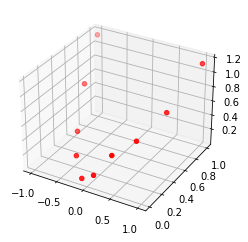

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, x**2, tnoisy, c='r')

__III.b__ Learning the linear model (in the higher dimensional space)

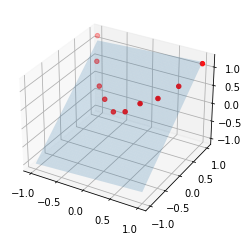

In [55]:
xprediction = np.linspace(-1,1,50)
x2prediction = np.linspace(-1,1,50)

xx, xx2 = np.meshgrid(xprediction, x2prediction)

predictionMat = np.hstack((np.ones((len(xx.flatten()),1)),\
                           xx.flatten().reshape(-1,1), \
                           xx2.flatten().reshape(-1,1)))

predicted_target = reg.predict(predictionMat)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, xx2, predicted_target.reshape(np.shape(xx)), alpha=0.2)
ax.scatter(x, x**2, tnoisy, c='r')
plt.show()

In [42]:
XtildeMat = np.hstack((np.ones((len(x),1)), \
                       x.reshape(-1,1), (x**2).reshape(-1,1)))

print(XtildeMat)

[[ 1.         -1.          1.        ]
 [ 1.         -0.77777778  0.60493827]
 [ 1.         -0.55555556  0.30864198]
 [ 1.         -0.33333333  0.11111111]
 [ 1.         -0.11111111  0.01234568]
 [ 1.          0.11111111  0.01234568]
 [ 1.          0.33333333  0.11111111]
 [ 1.          0.55555556  0.30864198]
 [ 1.          0.77777778  0.60493827]
 [ 1.          1.          1.        ]]


__III.c__ Bringing the prediction in the orinal space

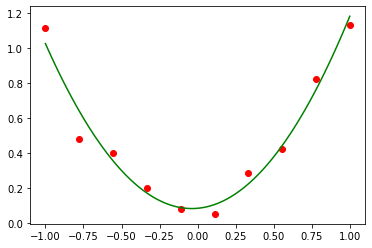

In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(XtildeMat, tnoisy)

x_prediction = np.linspace(-1,1,100)

predictionMat = np.hstack((np.ones((len(x_prediction),1)), \
                       x_prediction.reshape(-1,1),\
                           (x_prediction**2).reshape(-1,1)))


predictions = reg.predict(predictionMat)


plt.scatter(x, tnoisy, c='r')
plt.plot(x_prediction, predictions, c='g')
plt.show()

### IV. Overfitting and regularization

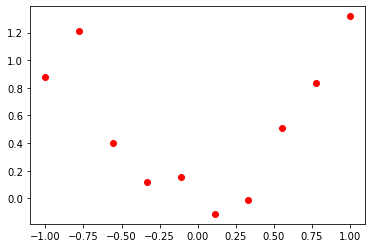

In [56]:

x = np.linspace(-1,1,10)

beta0true = .1
beta1true = .1
beta2true = 1

t = beta0true + beta1true *x + beta2true * (x**2)

tnoisy = t + np.random.normal(0,.2,len(x))

plt.scatter(x, tnoisy, c='r')
plt.show()

__IV.a__ Generating the high dimensional model

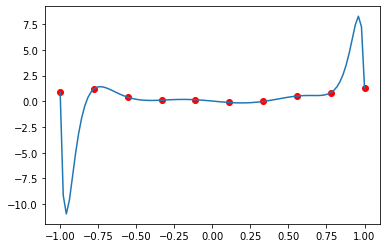

In [70]:
from sklearn.preprocessing import PolynomialFeatures

# Generating high dimensional (high complexity) model

poly = PolynomialFeatures(50)
XtildeMat = poly.fit_transform(x.reshape(-1,1))

reg = LinearRegression()
reg.fit(XtildeMat, tnoisy)

x_prediction = np.linspace(-1,1,100)

predictions = reg.predict(poly.fit_transform(x_prediction.reshape(-1,1)))

plt.plot(x_prediction,predictions)
plt.scatter(x, tnoisy, c='r')
plt.show()


__IV.b__ Regularizing with ridge/Lasso

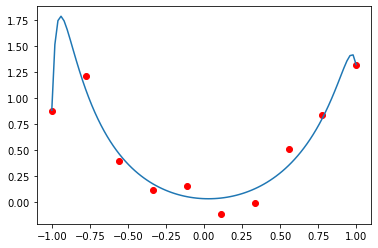

In [73]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=.1)
clf.fit(XtildeMat, tnoisy)

x_prediction = np.linspace(-1,1,100)

predictions = clf.predict(poly.fit_transform(x_prediction.reshape(-1,1)))

plt.plot(x_prediction,predictions)
plt.scatter(x, tnoisy, c='r')
plt.show()
